In [1]:
from MyEDFImports import edf_dir, import_ecg, import_stages, get_edf_filenames, load_all_data, load_data, three_stages_transform, stages_names_3_outputs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [2]:
filenames = get_edf_filenames()
name = filenames[2]

In [90]:
name

'CX230050.edf'

Extracting EDF parameters from C:\Users\tadeu\PycharmProjects\mgr_sleep_states\Jean-Pol_repaired_headers\CX230050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: ECG 1
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2006-05-30 21:44:47 UTC
 nchan: 1
 projs: []
 sfreq: 500.0 Hz
>


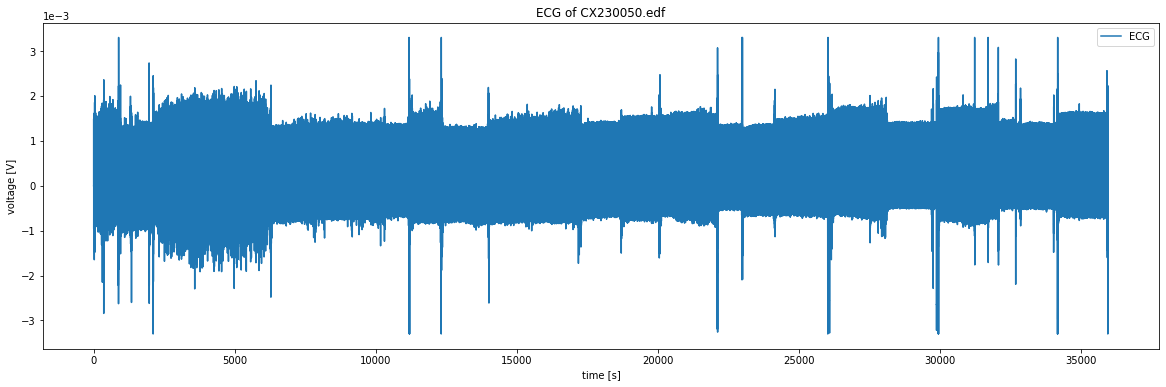

In [3]:
data = import_ecg(name)
print(data.info)
y = data[0][0].T
x = data[0][1]
def plot_edf(x,y):
    plt.figure(figsize=(20, 6))
    plt.step(x, y, )
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.legend(['ECG'])
    plt.xlabel('time [s]')
    plt.ylabel('voltage [V]')
    plt.title(f"ECG of {name}")
    plt.show()
plot_edf(x,y)

In [4]:
def stages_one_file(name, edf_dir = edf_dir):
    stages_file = edf_dir + '//' + name + '_stages.txt'
    stages = pd.read_csv(stages_file, comment='%', delimiter='	', index_col=0).drop('Unnamed: 3', axis=1)
    return stages

In [61]:
stages = stages_one_file(name).drop(['Time'], axis=1)
stages = stages['stage'].to_numpy()
stages = three_stages_transform(stages)
stages = np.array(stages)

In [115]:
y_stages = np.repeat(stages, int(1e4))
# adding 1000 points at the end because the stages are only up to a "whole" point
y_stages = np.append(y_stages, np.repeat(y_stages[-1], 1000))
len(y_stages)

17981000

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Python\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_a

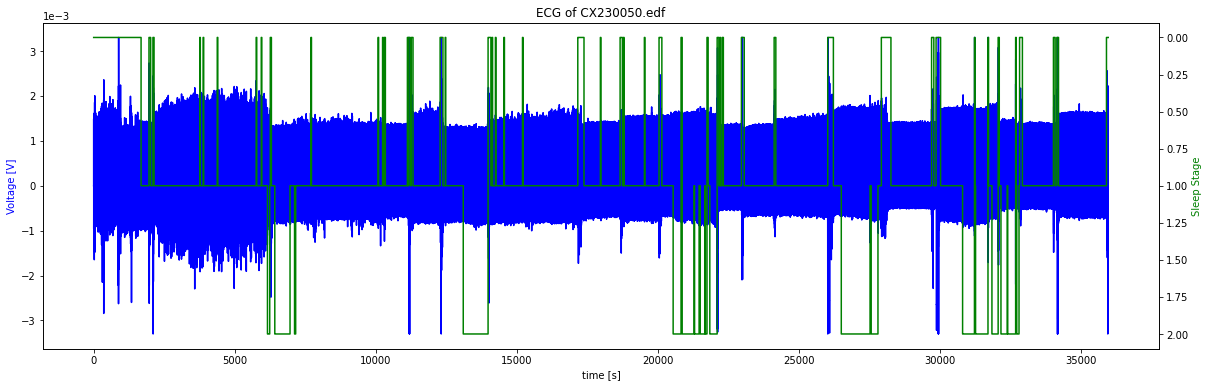

In [124]:
def draw_hypnogram(x, y, y_stages):
    fig, ax1 = plt.subplots(figsize=(20,6))
    ax2 = ax1.twinx()
    ax1.step(x, y, 'b-')
    ax2.step(x,y_stages, 'g-')
    ax2.invert_yaxis()
    ax1.set_xlabel('time [s]')
    ax1.set_ylabel('Voltage [V]', color='b')
    ax2.set_ylabel('Sleep Stage', color='g')
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    # plt.legend(['ECG'])
    plt.title(f"ECG of {name}")
    plt.show()
draw_hypnogram(x, y, y_stages)


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Python\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_a

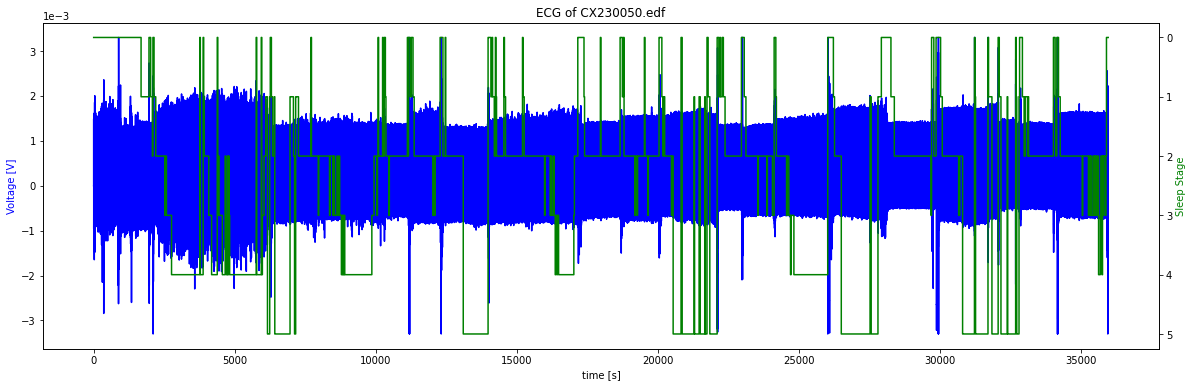

In [127]:
stages_6 = stages_one_file(name)
stages_6 = stages_6['stage'].to_numpy()
stages_6 = np.repeat(stages_6, int(1e4))
# adding 1000 points at the end because the stages are only up to a "whole" point
stages_6 = np.append(stages_6, np.repeat(stages_6[-1], 1000))
len(y_stages)
draw_hypnogram(x, y, stages_6)

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Python\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_a

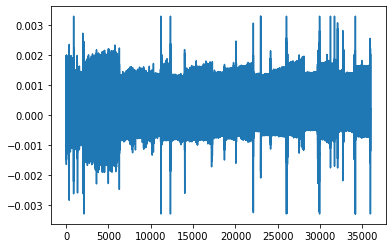

In [119]:
# plt.step(x, y_stages)
plt.plot(x,y)

In [49]:
data_windows = load_data(data)
len(stages) == len(data_windows)

file with 1798 windows


True

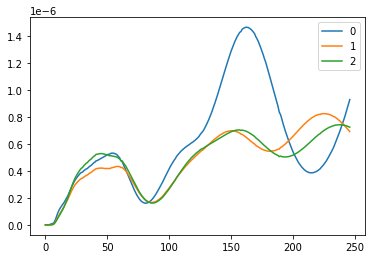

In [97]:
scales = range(1, 248)
waveletname = 'morl'
coefs_sq = []
for stage in [0,1,2]:
    random_ind = np.random.choice(np.where(stages == stage)[0])
    random_data = data_windows[random_ind]
    coef, freq = pywt.cwt(random_data, scales, waveletname)
    coef2 = np.square(coef)
    coefs_sq.append(coef2)
avgs = [np.average(coef, axis=1) for coef in coefs_sq]

def plot_coefs(coef):
    plt.imshow(coef, extent=[-1, 1, 1, 128], cmap='PRGn', aspect='auto',
           vmax=abs(coef).max(), vmin=-abs(coef).max(), label=stage)
    plt.title(stages_names_3_outputs[stage])
    plt.show()

def plot_mult_lines(avgs):
    for avg in avgs:
        plt.plot(avg)
    plt.legend(stages_names_3_outputs.keys())
    plt.show()
#plot_coefs(coefs)
plot_mult_lines(avgs)

In [86]:
avgs = []
coef = []
for stage in [0]:
    while True:
        random_ind = np.random.randint(len(stages))
        if stages[random_ind-1] == stages[random_ind] == stages[random_ind+1]:
            break
    # random_data = data[random_ind]
    for i in [-1,0,1]:
        coef, freq = pywt.cwt(data_windows[random_ind+i], scales, waveletname)
    coefs.append(coef)
avgs = [np.average(coef, axis=1) for coef in coefs]

In [89]:
len(avgs)

10

In [67]:
data_windows.shape

(1798, 10000)

In [ ]:
np.random.choice(data)

In [ ]:
data.shape

In [ ]:
for coef in coefs:
    plot_coefs(coef)

In [ ]:
plt.plot(avgs[0])
plt.plot(avgs[1])
plt.plot(avgs[2])


In [64]:
1 == 1 == 1

True